#                      Phyu-ShunLei_Problem 1 & 3





# **Problem 1**

**(a)**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the data
df = pd.read_csv('eBayAuctions.csv')

# Convert 'Duration' into a categorical variable
duration_map = {1: 'One Day', 3: 'Three Days', 5: 'Five Days', 7: 'Seven Days', 10: 'Ten Days'}
df['Duration_Cat'] = df['Duration'].map(duration_map)
print(df[['Duration', 'Duration_Cat']].head())




   Duration Duration_Cat
0         5    Five Days
1         5    Five Days
2         5    Five Days
3         5    Five Days
4         5    Five Days


In [2]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
Duration_Cat    0
dtype: int64


|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 2.12
|   |   |   |--- ClosePrice <= 1.24
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  1.24
|   |   |   |   |--- class: 1
|   |   |--- OpenPrice >  2.12
|   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- OpenPrice <= 3.00
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  3.00
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- ClosePrice <= 15.12
|   |   |   |--- class: 0
|   |   |--- ClosePrice >  15.12
|   |   |   |--- class: 1
|   |--- sellerRating >  601.50
|   |   |--- ClosePrice <= 10.00
|   |   |   |--- OpenPrice <= 4.99
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  4.99
|   |   |   |   |--- ClosePrice <= 6.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ClosePrice >  6.99
|   |   |   |   |   |--- class: 0
|   |   |--- ClosePrice >  10.00
|   |   |   |--- OpenPrice <= 10.49
|   |   |   |   |--- class: 1
| 

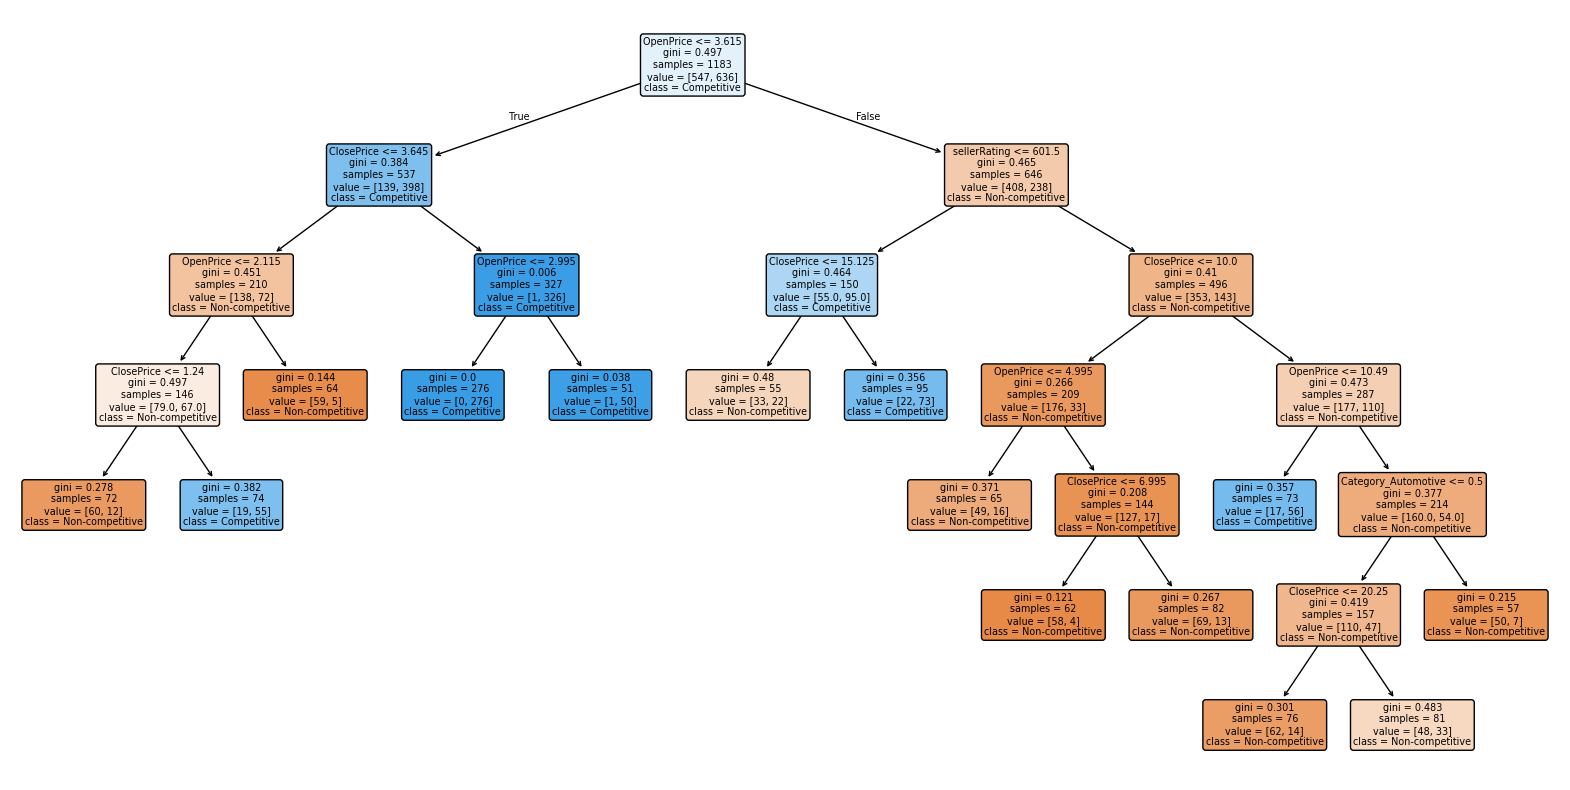

In [3]:
# Select the features and target variable
X = df[['Category', 'currency', 'sellerRating', 'Duration', 'endDay', 'ClosePrice','OpenPrice']]
y = df['Competitive?']  # 1 for competitive, 0 for non-competitive

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X,drop_first=True)

# Split the data into training (60%) and validation (40%) datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the classification tree model
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7)
clf.fit(X_train, y_train)

# Extract and display the decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# Evaluate model performance on the validation set
accuracy = clf.score(X_valid, y_valid)
print(f"Validation Accuracy: {accuracy}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X.columns), class_names=['Non-competitive', 'Competitive'], filled=True, rounded=True)
plt.show()


**Decision Rules**

Rule 1: Low Opening Price Auctions (≤ 3.62)

1️. IF OpenPrice ≤ 3.62 & ClosePrice ≤ 3.64 & OpenPrice ≤ 2.12 & ClosePrice ≤ 1.24 then Auction is Noncompetitive (0)

2.IF OpenPrice ≤ 3.62 & ClosePrice ≤ 3.64 & OpenPrice ≤ 2.12 & ClosePrice > 1.24 then Auction is Competitive (1)

3.IF OpenPrice ≤ 3.62 & ClosePrice ≤ 3.64 & OpenPrice > 2.12 then Auction is Noncompetitive (0)

4.IF OpenPrice ≤ 3.62 & ClosePrice > 3.64 & OpenPrice ≤ 3.00 then Auction is Competitive (1)

5.IF OpenPrice ≤ 3.62 & ClosePrice > 3.64 & OpenPrice > 3.00 then Auction is Competitive (1)



Rule 2: High Opening Price Auctions (> 3.62)

6.IF OpenPrice > 3.62 & sellerRating ≤ 601.50 & ClosePrice ≤ 15.12 then Auction is Noncompetitive (0)

7.IF OpenPrice > 3.62 & sellerRating ≤ 601.50 & ClosePrice > 15.12 then Auction is Competitive (1)

8.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice ≤ 10.00 & OpenPrice ≤ 4.99 then Auction is Noncompetitive (0)

9.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice ≤ 10.00 & OpenPrice > 4.99 & ClosePrice ≤ 6.99 then Auction is Noncompetitive (0)

10.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice ≤ 10.00 & OpenPrice > 4.99 & ClosePrice > 6.99 then Auction is Noncompetitive (0)



Rule 3: Very High Closing Price Auctions

11.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice > 10.00  & OpenPrice ≤ 10.49 then Auction is Competitive (1)

12.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice > 10.00 & OpenPrice > 10.49 & Category_Automotive ≤ 0.50 & ClosePrice ≤ 20.25 then Auction is Noncompetitive (0)

13.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice > 10.00 & OpenPrice > 10.49 & Category_Automotive ≤ 0.50 & ClosePrice > 20.25 then Auction is Noncompetitive (0)

14.IF OpenPrice > 3.62 & sellerRating > 601.50 & ClosePrice > 10.00 & OpenPrice > 10.49 & Category_Automotive > 0.50 then Auction is Noncompetitive (0)

If I had to slightly reduce
 the number of predictors due to software limitations,currency would be a good variable to choose, as it may have less influence compared to variables like SellerRating or AuctionCategory.

**(b)**



The model generates clear decision rules which can help sellers to adjust auction settings to increase competitiveness and considers multiple influencing factors such as seller rating , starting price, aution duration which all contribute to aution competitiveness.

However, this model is trained from the histrocial data ( from 2004 ), market trends will be changing overtime and the model will not be able to check current active listings on eBay, which affect competitiveness.

So, to improve the model for the practical use, the rencent ebay data should be used and the model should be constantly updated and incorporate with real time data.

**(c)**

 **Interesting Information**

- The starting price plays as the major role and the rule shows that the lower opening prices increase the chances of an auction being competitive.

- The variable, seller rating influence competitiveness but not always, i.e,trust in the seller plays a role in high-value transactions, while cheaper items may sell regardless of seller reputation.

-The category of automovitive tend to be incompetitive tend to be noncompetitive, even when ClosePrice is high.

**Uninteresting Information**
- ClosePrice is a strong indicator but not an autionable variable.

- Seller rating only becomes important as it reach high threshold.

**(d)**

|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- Duration_10 >  0.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   | 

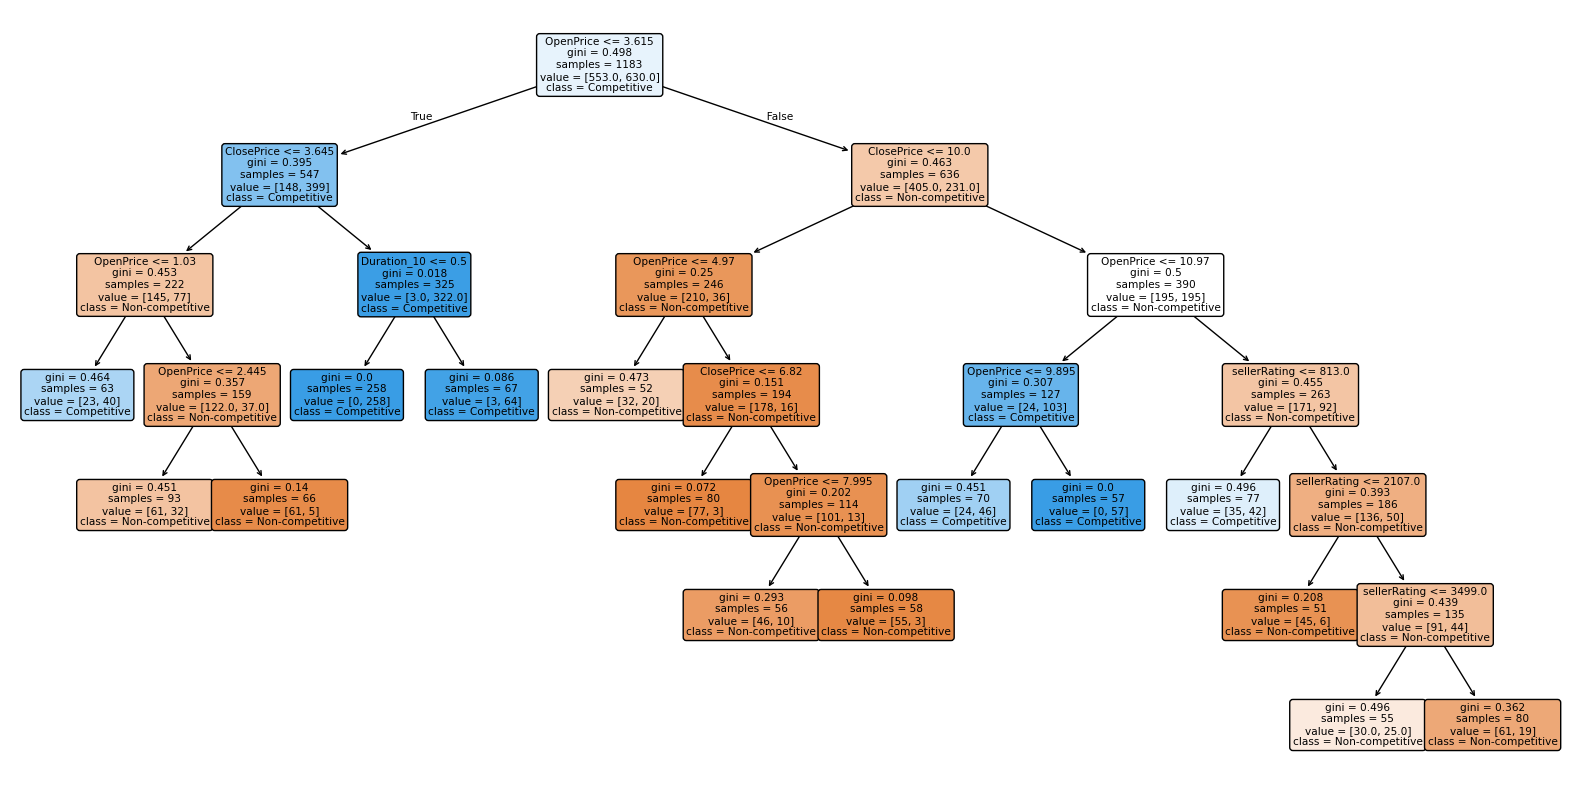

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data (Assuming eBayAuctions.csv is preprocessed)
data = pd.read_csv("eBayAuctions.csv")

# Convert 'Duration' to categorical if not already
data['Duration'] = data['Duration'].astype(str)

# Define predictors for new auction prediction
predictors = ['OpenPrice', 'ClosePrice', 'sellerRating', 'Duration', 'endDay',]
X = data[predictors]
y = data['Competitive?']  # Assuming 'Competitive' is the target variable

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training (60%) and validation (40%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Train classification tree
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)
clf.fit(X_train, y_train)

# Display decision tree rules
rules = export_text(clf, feature_names=list(X.columns))
print(rules)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X.columns), class_names=['Non-competitive', 'Competitive'], filled=True, rounded=True)
plt.show()


**Decision Tree Rules**

Rule 1: Low Opening Price Auctions (≤ 3.62)

1.IF OpenPrice ≤ 3.62 AND ClosePrice ≤ 3.64 AND OpenPrice ≤ 1.03 then Auction is Competitive (1)

2.IF OpenPrice ≤ 3.62 AND ClosePrice ≤ 3.64 AND OpenPrice > 1.03 then Auction is Noncompetitive (0)

3.IF OpenPrice ≤ 3.62 AND ClosePrice > 3.64 AND Duration_10 ≤ 0.50 then Auction is Competitive (1)

4.IF OpenPrice ≤ 3.62 AND ClosePrice > 3.64 AND Duration_10 > 0.50 then Auction is Competitive (1)

Rule 2: High Opening Price Auctions (> 3.62)

5.IF OpenPrice > 3.62 AND ClosePrice ≤ 10.00 AND OpenPrice ≤ 4.97 then Auction is Noncompetitive (0)

6.IF OpenPrice > 3.62 AND ClosePrice ≤ 10.00 AND OpenPrice > 4.97 AND ClosePrice ≤ 6.82 then Auction is Noncompetitive (0)

7.If OpenPrice > 3.62 AND ClosePrice ≤ 10.00 AND OpenPrice > 4.97 AND ClosePrice > 6.82 AND OpenPrice ≤ 7.99 then Auction is Noncompetitive (0)

8.IF OpenPrice > 3.62 AND ClosePrice ≤ 10.00 AND OpenPrice > 7.99 then  Auction is Noncompetitive (0)

9.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice ≤ 10.97 AND OpenPrice ≤ 9.89 then Auction is Competitive (1)

10.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice ≤ 10.97 AND OpenPrice > 9.89 then Auction is Competitive (1)

11.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating ≤ 813 then Auction is Competitive (1)

12.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating > 813 AND sellerRating ≤ 2107 then Auction is Noncompetitive (0)

13.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating > 2107 AND sellerRating ≤ 3499 then Auction is Noncompetitive (0)

14.IF OpenPrice > 3.62 AND ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating > 3499 then Auction is Noncompetitive (0)



**Report for smaller set of rules**

**Low Opening Price Auctions (OpenPrice ≤ 3.62)**

1.IF OpenPrice ≤ 1.03, then Auction is Competitive (1)

2.IF OpenPrice > 1.03 AND ClosePrice ≤ 3.64, then Auction is Noncompetitive (0)

3.IF OpenPrice > 1.03 AND ClosePrice > 3.64, then Auction is Competitive (1)



**High Opening Price Auctions (OpenPrice > 3.62)**

4.IF ClosePrice ≤ 10.00 ,then Auction is Noncompetitive (0)

5.IF ClosePrice > 10.00 AND OpenPrice ≤ 10.97, then Auction is Competitive (1)

6.IF ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating ≤ 813, then Auction is Competitive (1)

7.IF ClosePrice > 10.00 AND OpenPrice > 10.97 AND sellerRating > 813 ,then Auction is Noncompetitive (0)





**(e)**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


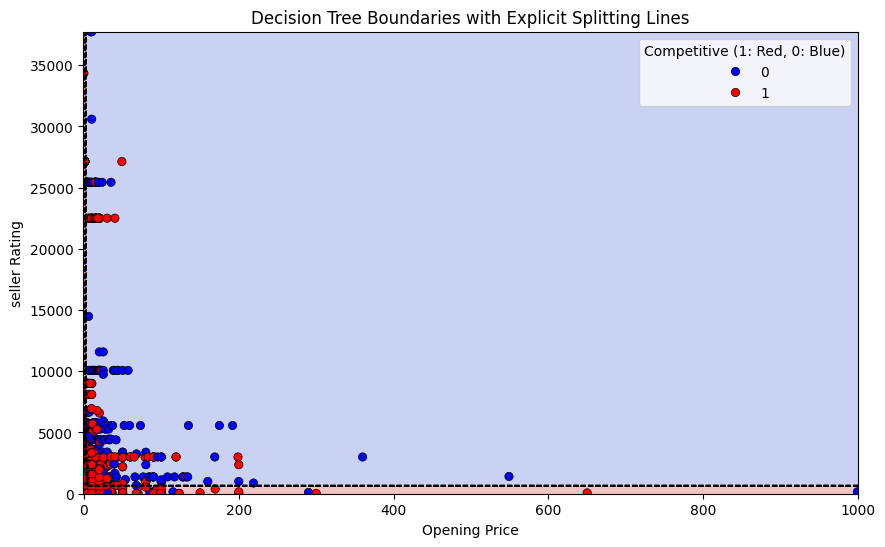

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Use only OpenPrice & SellerRating
X_subset = X[["OpenPrice", "sellerRating"]]  # Use X instead of df and 'sellerRating'
y = df["Competitive?"]  # Assuming "Competitive?" is the correct column name

# Split into training & validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_subset, y, test_size=0.4, random_state=42)


# Train a deeper Decision Tree for more visible boundaries
tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)
tree_clf.fit(X_train, y_train)

# Create a grid of values for visualization
x_min, x_max = X["OpenPrice"].min() - 1, X["OpenPrice"].max() + 1
y_min, y_max = X["sellerRating"].min() - 10, X["sellerRating"].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on grid points
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")  # Background decision regions
plt.contour(xx, yy, Z, colors="black", linewidths=1, linestyles="dashed")  # Highlighted splitting lines

# Scatter plot of actual auction data
sns.scatterplot(x=X["OpenPrice"], y=X["sellerRating"], hue=y, palette={0: "blue", 1: "red"}, edgecolor="k")

# Labels and title
plt.xlabel("Opening Price")
plt.ylabel("seller Rating")
plt.title("Decision Tree Boundaries with Explicit Splitting Lines")
plt.legend(title="Competitive (1: Red, 0: Blue)")
plt.show()


Yes, the split at OpenPrice , which is approximately equals to 5.17 makes logical sense because

1. The lower starting prices attract more bidders, increasing the likelihood of a competitive auction.

2. The higher starting prices may discourage bidding, leading to fewer auctions with multiple bids.

But, the model ignores SellerRating and the fact that it does not influence the split suggests that SellerRating might not be a strong predictor in this dataset.

**(f)**

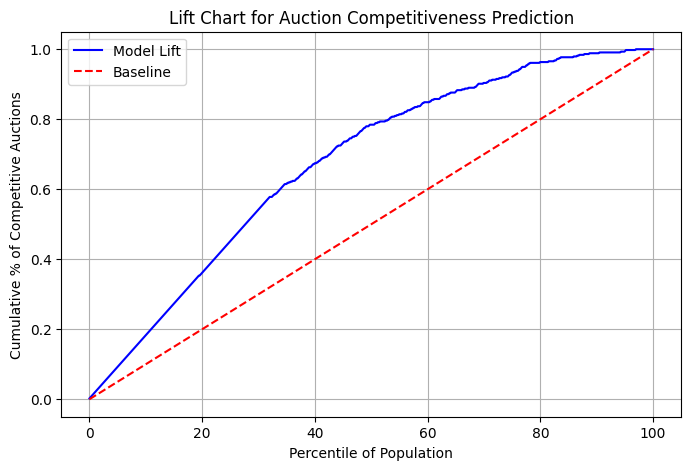

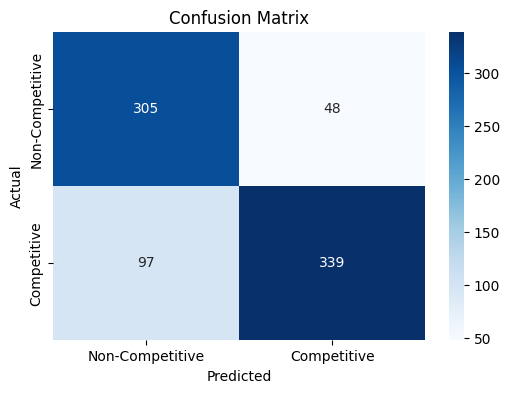

AUC-ROC Score: 0.8905


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Get predicted probabilities for the positive class (Competitive = 1)
y_probs = clf.predict_proba(X_valid)[:, 1]  # Changed tree_clf to clf

# Sort actual values by predicted probability
sorted_indices = np.argsort(-y_probs)  # Sort in descending order
y_valid_sorted = np.array(y_valid)[sorted_indices]

# Compute cumulative % of competitive auctions
cum_positives = np.cumsum(y_valid_sorted) / sum(y_valid_sorted)
percentile = np.linspace(0, 100, len(cum_positives))

# Plot Lift Chart
plt.figure(figsize=(8, 5))
plt.plot(percentile, cum_positives, label="Model Lift", color="blue")
plt.plot(percentile, percentile / 100, linestyle="dashed", label="Baseline", color="red")  # Random model
plt.xlabel("Percentile of Population")
plt.ylabel("Cumulative % of Competitive Auctions")
plt.title("Lift Chart for Auction Competitiveness Prediction")
plt.legend()
plt.grid()
plt.show()

# Compute Confusion Matrix
y_pred = clf.predict(X_valid)  # Get predicted class labels # Changed tree_clf to clf
cm = confusion_matrix(y_valid, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Competitive", "Competitive"],
            yticklabels=["Non-Competitive", "Competitive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compute AUC-ROC Score
auc = roc_auc_score(y_valid, y_probs)
print(f"AUC-ROC Score: {auc:.4f}")

**Lift Chart Interpretation**


The blue line (model lift) is above the red dashed line (baseline), indicating that the model performs better than random guessing.However, the curve does not reach 1 as quickly as in an ideal model, suggesting that the model is moderately effective but not perfect.

**Confusion Matrix Interpretation**

Accuracy: The model correctly classifies 644 out of 789 cases, which is fairly good.

False Positives (48): The model sometimes incorrectly predicts a non-competitive auction as competitive.

False Negatives (97): Some competitive auctions are misclassified as non-competitive, meaning the model misses potential successful auctions.

**Overall Performance**

The model performs reasonably well but still has misclassifications, particularly false negatives (97), which may impact sellers relying on this prediction.

The lift chart shows the model provides some improvement over random selection but is not perfectly discriminative.



**(g)**

Based on the last tree , we can conclude that-
- Opening price matters alot, i.e,very low starting prices (e.g., ≤ $1.03) are highly competitive.

- Closing price influences competitiveness meaning that higher closing prices (> $10.00) can lead to competitive auctions, especially when combined with higher seller ratings.

- If the auction duration is 10 days, it increases the chance of a competitive auction.

- Shorter durations (not explicitly mentioned here) might reduce competition.

- Although seller rating plays a role at higher price points, a seller rating (> 2107) does not necessarily improve competitiveness

**Recommendations for Sellers**

- Set a low starting price (≤ 3.62) to attract more bidders and create competition.
- Use a 10-day auction duration, as longer auctions give buyers more time to place bids.
-Optimize the closing price range—keeping it within a sweet spot (~10) if aiming for higher competition.
-Avoid setting a high starting price (> 10.97) unless your seller rating is strong.

# **Problem 3**

**(a)**

**(i)**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('ToyotaCorolla.csv')

# Check columns and missing values
print("Dataset columns:", df.columns)
print("Missing values:")
print(df.isnull().sum())

Dataset columns: Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')
Missing values:
Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee

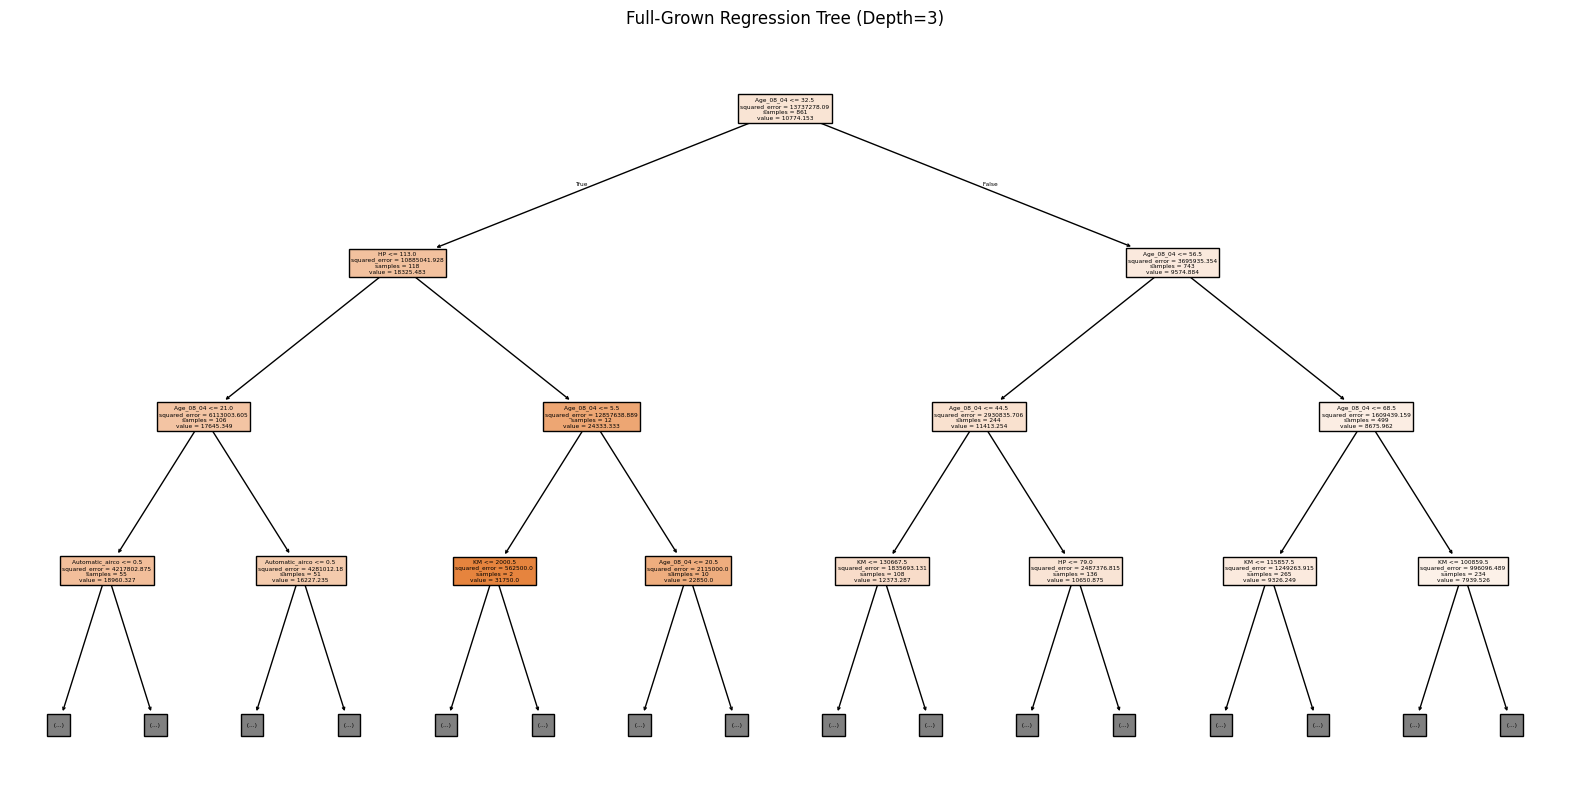

Most important features:
Age_08_04          0.844867
HP                 0.053789
KM                 0.049601
Automatic_airco    0.013358
dtype: float64
Training RMSE: 0.00
Validation RMSE: 1492.34


In [18]:
# Select relevant columns
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
            'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player',
            'Powered_Windows', 'Sport_Model', 'Tow_Bar']

target = 'Price'

# Use 'df' instead of 'data' to select columns from the original DataFrame
filtered_df = df[features + [target]]  # Assign to a new variable 'filtered_df'

# Convert categorical variables to dummies
filtered_df = pd.get_dummies(filtered_df, columns=['Fuel_Type'], drop_first=True) # Use 'filtered_df'

# Split into training (60%) and validation (40%)
train_data, val_data = train_test_split(filtered_df, test_size=0.4, random_state=1) # Use 'filtered_df'

X_train, y_train = train_data.drop(columns=[target]), train_data[target]
X_val, y_val = val_data.drop(columns=[target]), val_data[target]

# Train full-grown regression tree
full_tree = DecisionTreeRegressor(random_state=1)
full_tree.fit(X_train, y_train)

# Import plot_tree
from sklearn.tree import plot_tree

# Visualize decision tree structure
plt.figure(figsize=(20,10))
plot_tree(full_tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Full-Grown Regression Tree (Depth=3)")
plt.show()

# Feature importance
importances = pd.Series(full_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Most important features:")
print(importances.head(4))

# Predict and evaluate
train_preds = full_tree.predict(X_train)
val_preds = full_tree.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Validation RMSE: {val_rmse:.2f}')


**(ii)**

Training RMSE: 0.00
Validation RMSE: 1492.34


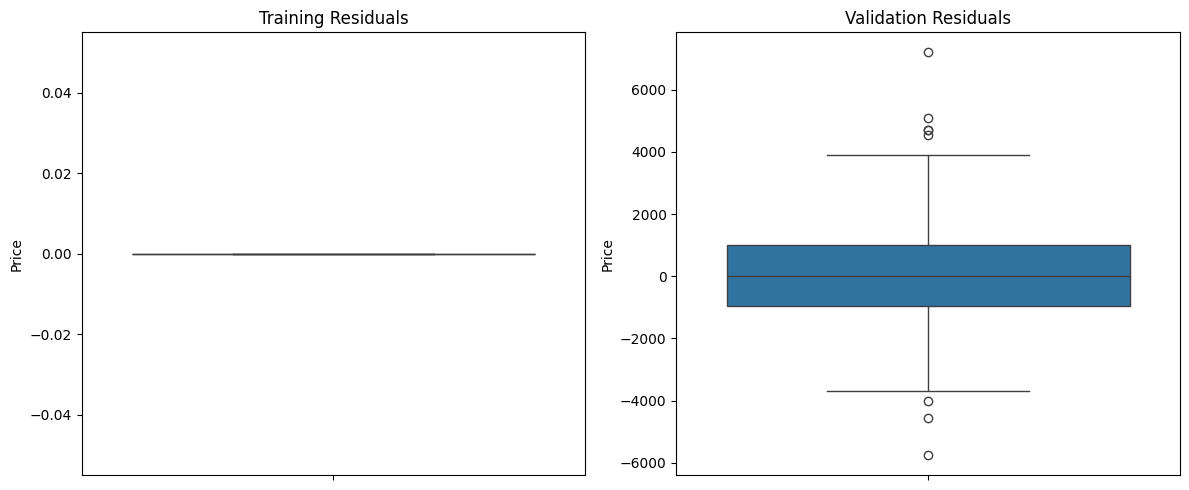

In [19]:
# Predict and evaluate
train_preds = full_tree.predict(X_train)
val_preds = full_tree.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Validation RMSE: {val_rmse:.2f}')# Boxplots for residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=y_train - train_preds)
plt.title('Training Residuals')

plt.subplot(1, 2, 2)
sns.boxplot(y=y_val - val_preds)
plt.title('Validation Residuals')

plt.tight_layout()
plt.show()

**Comparison of Prediction Errors**

Training RMSE = 0.00 indicates that the model perfectly fits the training data.

Validation RMSE = 1492.34 indicates that the error is significantly larger, meaning the model does not generalize well to new data.


**Boxplot Interpretation**

Training Residuals- A single line at zero suggests the model has overfitted the training data, memorizing it completely.

Validation Residuals- A wider spread with outliers indicates that the model struggles to predict unseen data accurately.

**Why Does This Occur?**

- Overfitting - The full-grown regression tree is too complex, capturing noise instead of general patterns.

- Lack of Generalization - The model performs well on training data but fails to adapt to validation data, leading to high errors.

**(iii)**

To achieve better validation predictive performance at the expense of training performance,we need to reduce overfitting and improve generalization by:

- Increasing the training data, to help the model learn more general patterns
- Using cross-validation,k-fold cross-validation to evaluate performance on multiple subsets.
- Pruning the tree by using GridSearchCB ti fine-tune hyperparameters such as max_depth and min_samples_split.

**(iv)**

Best parameters: {'max_depth': 7, 'min_samples_split': 8}


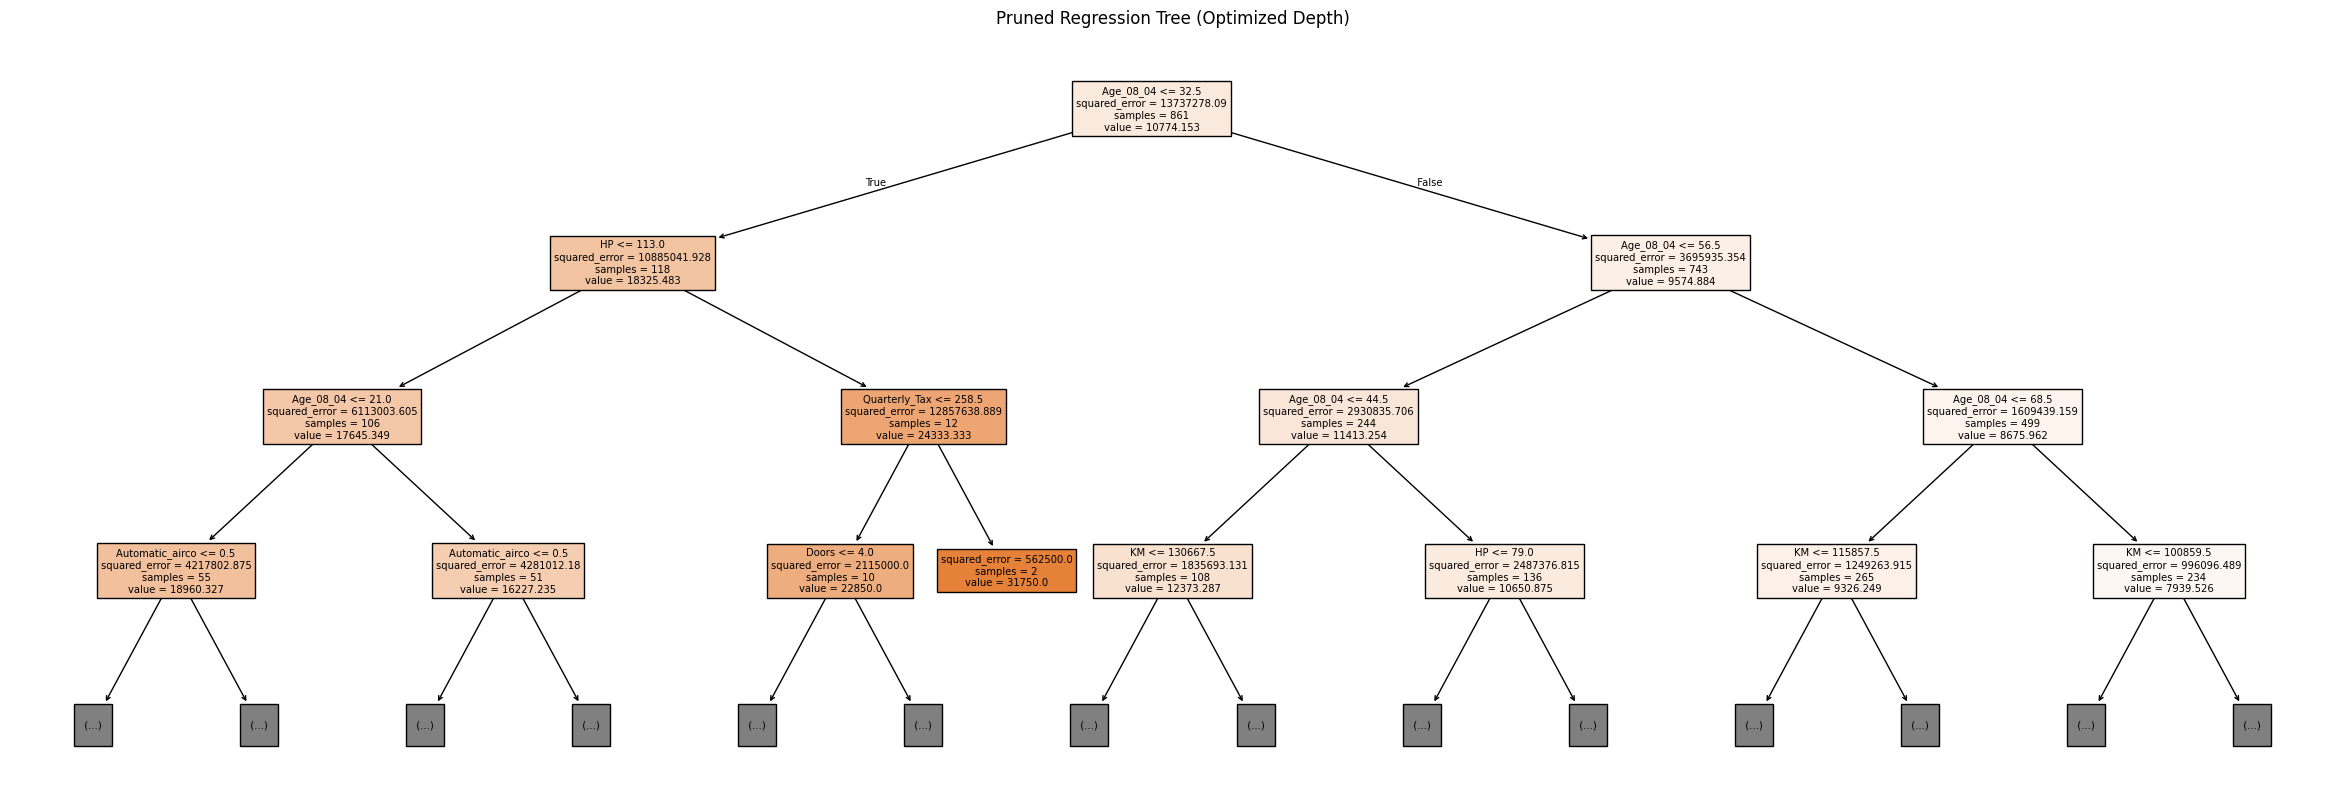

In [20]:
# GridSearch for a pruned tree
param_grid = {'max_depth': range(3, 15), 'min_samples_split': range(2, 20, 2)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_reg_tree = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# Visualize small pruned tree
plt.figure(figsize=(30, 10))
plot_tree(best_reg_tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Pruned Regression Tree (Optimized Depth)")
plt.show()

In [ ]:
# Predict and evaluate pruned tree
pruned_train_preds = best_reg_tree.predict(X_train)
pruned_val_preds = best_reg_tree.predict(X_val)

pruned_train_rmse = np.sqrt(mean_squared_error(y_train, pruned_train_preds))
pruned_val_rmse = np.sqrt(mean_squared_error(y_val, pruned_val_preds))

print(f'Pruned Training RMSE: {pruned_train_rmse:.2f}')
print(f'Pruned Validation RMSE: {pruned_val_rmse:.2f}')


Pruned Training RMSE: 859.46
Pruned Validation RMSE: 1185.28



**Full-grown tree (Unpruned)**

Training RMSE = 0.00 mean that it erfectly memorized training data (overfitting).

Validation RMSE = 1492.34 means tha poor generalization to new data.

Consequently, this model is too complex and does not work well on unseen data.

**Pruned Tree**

Training RMSE = 859.46 ia higher than 0, meaning that there is some training error.
Validation RMSE = 1185.28 is lower than the full-grown tree’s validation RMSE.

So, the pruned tree showes better generalization.

**Conclusion**

- The pruned tree is better for making real world predictions because it avoids overfitting.

- The full-grown tree is too complex and memorizes training data, failing to generalize.

-The RMSE gap between training and validation is much smaller in the pruned tree, showing better balance.



**(b)**

**(i)**

Best Regression Tree Depth: 7
Best Classification Tree Depth: 5
Feature Importances (Regression Tree): [8.81821001e-01 3.12143963e-02 2.83593140e-02 2.50920140e-03
 1.97497009e-02 1.85729428e-03 1.69856682e-03 7.10339069e-03
 0.00000000e+00 1.16236345e-03 6.04658930e-03 1.37984822e-02
 8.94331328e-05 3.03523645e-03 1.55503020e-03 0.00000000e+00]
Feature Importances (Classification Tree): [0.61819308 0.12949356 0.06359999 0.         0.05035716 0.01719955
 0.         0.         0.         0.01512216 0.         0.05391622
 0.         0.05211828 0.         0.        ]


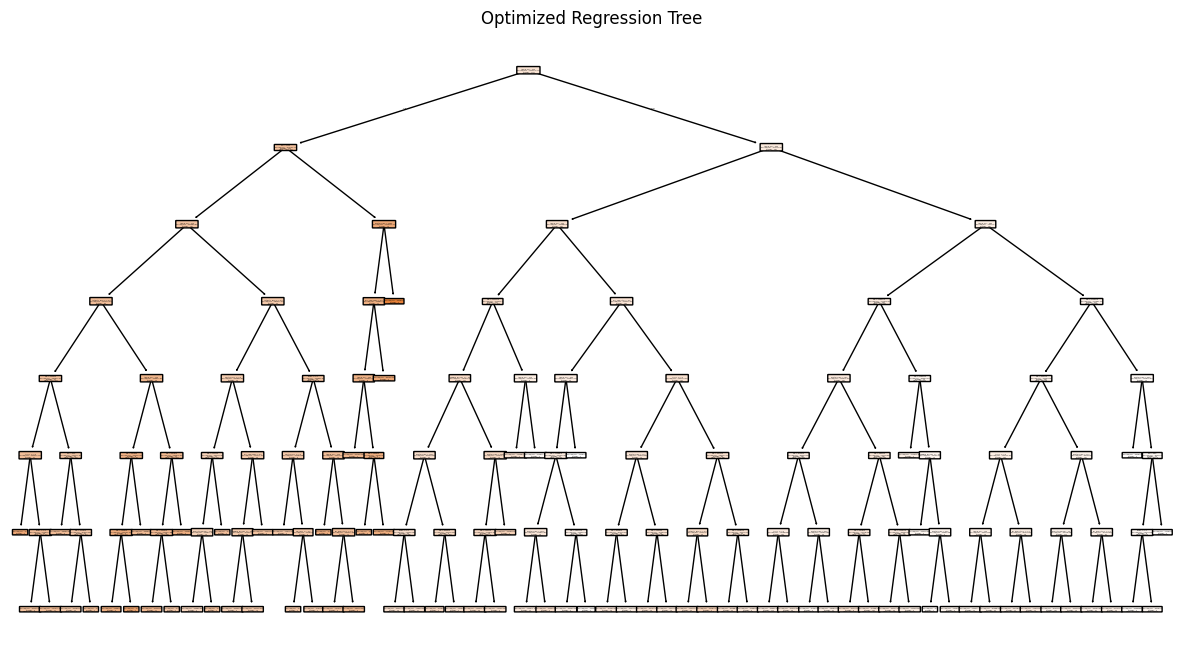

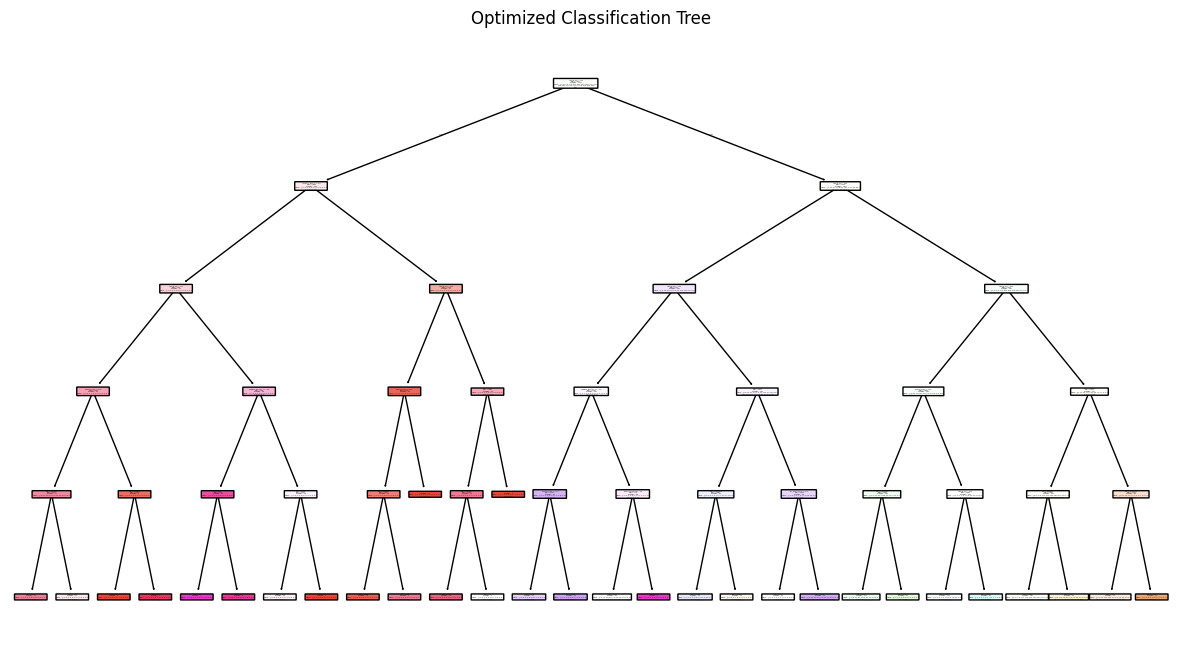

Top 5 Predictors (Regression Tree): [('Age_08_04', np.float64(0.8818210008075442)), ('KM', np.float64(0.031214396336422878)), ('HP', np.float64(0.02835931398181456)), ('Quarterly_Tax', np.float64(0.019749700936267805)), ('Automatic_airco_1', np.float64(0.013798482214228257))]
Top 5 Predictors (Classification Tree): [('Age_08_04', np.float64(0.6181930820363404)), ('KM', np.float64(0.12949356287897165)), ('HP', np.float64(0.06359998594382327)), ('Automatic_airco_1', np.float64(0.05391621876963222)), ('Powered_Windows_1', np.float64(0.05211827981604097))]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Load dataset
df = pd.read_csv("ToyotaCorolla.csv")

# Convert Price into a categorical variable with 20 bins
df["Binned_Price"], bin_edges = pd.qcut(df["Price"], q=20, labels=False, retbins=True, duplicates="drop")

# efine predictors and target variables
predictors = ["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax",
              "Mfr_Guarantee", "Guarantee_Period", "Airco", "Automatic_airco", "CD_Player",
              "Powered_Windows", "Sport_Model", "Tow_Bar"]

X = df[predictors]  # Get the predictor variables
y_reg = df["Price"]  # Target for Regression Tree
y_class = df["Binned_Price"]  # Target for Classification Tree

# Convert categorical variables to numeric using pd.get_dummies
X = pd.get_dummies(X, columns=["Fuel_Type", "Automatic", "Mfr_Guarantee", "Airco", "Automatic_airco",
                               "CD_Player", "Powered_Windows", "Sport_Model", "Tow_Bar"], drop_first=True)

# Train/Test Split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train and optimize Regression Tree
param_grid = {"max_depth": [3, 5, 7, 10], "min_samples_split": [2, 5, 10]}
reg_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
reg_tree.fit(X_train, y_train_reg)
best_reg_tree = reg_tree.best_estimator_

# Train and optimize Classification Tree
class_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
class_tree.fit(X_train, y_train_class)
best_class_tree = class_tree.best_estimator_

# Compare tree structures
print("Best Regression Tree Depth:", best_reg_tree.get_depth())
print("Best Classification Tree Depth:", best_class_tree.get_depth())
print("Feature Importances (Regression Tree):", best_reg_tree.feature_importances_)
print("Feature Importances (Classification Tree):", best_class_tree.feature_importances_)

# Visualize the smaller trees
plt.figure(figsize=(15, 8))
plot_tree(best_reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Optimized Regression Tree")
plt.show()

plt.figure(figsize=(15, 8))
plot_tree(best_class_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Optimized Classification Tree")
plt.show()

# Extract and display top predictors for both trees
def get_top_predictors(model, feature_names, top_n=5):
    feature_importances = model.feature_importances_
    top_indices = np.argsort(feature_importances)[::-1][:top_n]  # Get indices of top N features
    top_features = [(feature_names[i], feature_importances[i]) for i in top_indices]
    return top_features

# Top 5 predictors for Regression Tree
top_predictors_reg = get_top_predictors(best_reg_tree, X.columns, top_n=5)
print("Top 5 Predictors (Regression Tree):", top_predictors_reg)

# Top 5 predictors for Classification Tree
top_predictors_class = get_top_predictors(best_class_tree, X.columns, top_n=5)
print("Top 5 Predictors (Classification Tree):", top_predictors_class)



The Regression Tree (RT) is larger in size with more splits, as it aims to predict the exact price of the car. It has a deeper structure to minimize RMSE. The top predictors in RT are Age_08_04, KM, HP, Quarterly_Tax, and Automatic_airco_1, which are mostly continuous variables directly affecting price.

On the other hand, the Classification Tree (CT) is smaller and shallower since it categorizes price into bins instead of predicting an exact value. While Age_08_04 (61.82%) and KM (12.95%) remain dominant predictors, categorical features like Automatic_airco_1 and Powered_Windows_1 play a more significant role in classification compared to RT. This suggests that car features related to comfort and automation are more relevant when categorizing price ranges rather than determining an exact price.

In summary, the RT is more complex and precise, capturing price differences, while the CT is simpler and more interpretable, focusing on broader price categorization.

**(ii)**

In [ ]:
#Predict price for the given Toyota Corolla specifications
toyota_specs = pd.DataFrame([[77, 117000, "Petrol", 110, "No", 5, 100, "No", 3, "Yes", "No", "No", "No", "No", "Yes"]],
                            columns=predictors)

toyota_specs = pd.get_dummies(toyota_specs, columns=["Fuel_Type", "Automatic", "Mfr_Guarantee", "Airco",
                                                     "Automatic_airco", "CD_Player", "Powered_Windows",
                                                     "Sport_Model", "Tow_Bar"], drop_first=True)

toyota_specs = toyota_specs.reindex(columns=X_train.columns, fill_value=0)

# Predict using Regression Tree (RT)
pred_price_reg = best_reg_tree.predict(toyota_specs)[0]

# Predict using Classification Tree (CT)
predicted_bin_ct = int(best_class_tree.predict(toyota_specs)[0])

# Convert bin index to estimated price range (using correct bin edges)
if predicted_bin_ct < len(bin_edges) - 1:
    price_range_ct = (float(bin_edges[predicted_bin_ct]), float(bin_edges[predicted_bin_ct + 1]))
else:
    price_range_ct = (float(bin_edges[-2]), float(bin_edges[-1]))

# Print results
print("\nPredicted Price (Regression Tree):", round(pred_price_reg, 2))
print("Predicted Binned Price (Classification Tree):", predicted_bin_ct)
print(f"Estimated Price Range (CT): {price_range_ct}")



Predicted Price (Regression Tree): 7924.1
Predicted Binned Price (Classification Tree): 0
Estimated Price Range (CT): (4350.0, 6900.0)


**(iii)**

**(Comparison of Predictions)**

**Predictors Used**


- Both RT and CT rely heavily on Age_08_04, KM, and HP, but RT also gives notable importance to Quarterly_Tax and Automatic_airco_1, while CT considers Powered_Windows_1 more relevant.

- RT focuses on numerical precision, whereas CT gives more weight to categorical features, which help in classifying price bins.

**Magnitude of Difference**

The RT provides an exact numeric prediction (7,924.10),  while CT assigns the car to a price range (4,350 – 6,900), which is much lower than RT's estimate.

The gap between RT and CT predictions suggests that RT may be capturing finer variations in price, while CT is coarser in its categorization.

**Advantages and Disadvantages to Two Methods**

Regression Tree (RT):

Pros

- More precise, useful for individual price estimation.

- Better suited for continuous value predictions.

Cons

- Prone to overfitting, leading to lower generalization on unseen data.

- More complex due to deep tree structure.


Classification Tree (CT):

Pros

- Simpler and more interpretable, as it categorizes prices into broader bins.

- More resistant to overfitting and better generalizes new data.

Cons

- Less precise, as it only provides a range instead of an exact value.

- May be inaccurate for boundary cases, where a car’s price might sit near the edge of a bin.